# Creación de Modelos de ML

## Importaciones

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


## Carga del CSV de train trabajado

In [3]:
df = pd.read_csv("data/train_trabajado.csv" )
df.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,...,Touchscreen,FullHD,QuadHD,UltraHD_4K,Retina,CPU_Marca,CPU_Serie,CPU_GHz,GPU_Marca,GPU_Tipo
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8.0,1TB HDD,...,0,0,0,0,0,Intel,i7,2.7,AMD,Radeon
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4.0,1TB HDD,...,0,0,0,0,0,Intel,Pentium,1.1,Intel,HD Graphics
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8.0,256GB SSD,...,0,1,0,0,0,Intel,i5,2.3,Intel,HD Graphics
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16.0,256GB SSD + 1TB HDD,...,0,0,0,1,0,Intel,i7,2.8,Nvidia,GeForce
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8.0,256GB SSD,...,1,1,0,0,0,Intel,i5,2.4,Intel,HD Graphics


## Escalado

Escalar las columnas numericas con StandardScaler para trabajar con valores escalados

In [4]:
df.columns

Index(['id', 'laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros', 'SSD_GB', 'HDD_GB', 'Hybrid_GB', 'Flash_GB',
       'ScreenResolution_clean', 'Width_px', 'Height_px', 'PPI', 'IPS',
       'Touchscreen', 'FullHD', 'QuadHD', 'UltraHD_4K', 'Retina', 'CPU_Marca',
       'CPU_Serie', 'CPU_GHz', 'GPU_Marca', 'GPU_Tipo'],
      dtype='object')

In [5]:
lista_columnas_escala = ["Ram", "Weight", "SSD_GB", "HDD_GB", "Hybrid_GB", "Flash_GB", "PPI", "CPU_GHz"]

In [6]:
scaler = StandardScaler()

In [7]:
df[lista_columnas_escala] = scaler.fit_transform(df[lista_columnas_escala])

In [8]:
df[lista_columnas_escala].head()

,Ram,Weight,SSD_GB,HDD_GB,Hybrid_GB,Flash_GB,PPI,CPU_GHz
0,-0.038512,0.501808,-0.970848,1.191148,-0.099834,-0.152725,-1.059750,0.803330
1,-0.855315,-0.049145,-0.970848,1.191148,-0.099834,-0.152725,-1.059750,-2.315602
2,-0.038512,-1.273484,0.407127,-0.794229,-0.099834,-0.152725,0.450039,0.023597
3,1.595095,3.654482,0.407127,1.191148,-0.099834,-0.152725,3.155440,0.998264
4,-0.038512,-1.181659,0.407127,-0.794229,-0.099834,-0.152725,0.695591,0.218530


Una vez escalados los numericos hay que ver como afectan los no numericos

In [9]:
df["Company"].value_counts()

Company
Lenovo       208
Dell         207
HP           189
Asus         108
Acer          75
Toshiba       37
MSI           34
Apple         17
Mediacom       7
Razer          6
Samsung        6
Fujitsu        3
Microsoft      3
Vero           3
Xiaomi         3
Chuwi          2
Google         2
LG             1
Huawei         1
Name: count, dtype: int64

Agrupar las marcas que menos frecuencia tienen en un unico grupo

In [10]:
marcas_frecuentes = ["Lenovo", "Dell", "HP", "Asus", "Acer", "Toshiba", "MSI", "Apple"]

df["Company_clean"] = df["Company"].apply(lambda x: x if x in marcas_frecuentes else "Otros")


In [11]:
df["TypeName"].value_counts()


TypeName
Notebook              522
Gaming                138
Ultrabook             135
2 in 1 Convertible     85
Workstation            18
Netbook                14
Name: count, dtype: int64

In [12]:
tipos_frecuentes = ["Notebook", "Gaming", "Ultrabook", "2 in 1 Convertible"]
df["TypeName_clean"] = df["TypeName"].apply(lambda x: x if x in tipos_frecuentes else "Otros")

Para las CPU trabajamos con las series. Si hace falta mas trabajaremos con las frecuencias
Investigando y comparando series de AMD e Intel, quedaria mas o menos asi.

In [13]:
df["CPU_Serie"].unique()

array(['i7', 'Pentium', 'i5', 'i3', 'M', 'Atom', 'Celeron'], dtype=object)

In [14]:
df["CPU_Serie"].count()

np.int64(912)

In [15]:
cpu_potencia = {
    "Atom": 0,
    "Celeron": 1,
    "M": 2,
    "Pentium": 3,
    "i3": 4,
    "i5": 5,
    "i7": 6
}


In [16]:
df["CPU_Potencia"] = df["CPU_Serie"].map(cpu_potencia)


In [17]:
df["CPU_Potencia"].count()

np.int64(912)

Ahora las GPU

In [18]:
df["GPU_Tipo"].value_counts()

GPU_Tipo
HD Graphics     510
GeForce         247
Radeon          117
Quadro           20
Iris Plus         8
Iris              3
FirePro           3
Other AMD         2
Other Nvidia      1
Other Intel       1
Name: count, dtype: int64

In [19]:
gpu_potencia = {
    "HD Graphics": 1,
    "Iris": 2,
    "Iris Plus": 2,
    "Radeon": 3,
    "GeForce": 4,
    "Quadro": 5,
    "FirePro": 5,
    "Other AMD": 3,
    "Other Nvidia": 4,
    "Other Intel": 1
}


In [20]:
df["GPU_Potencia"] = df["GPU_Tipo"].map(gpu_potencia)

Ahora volvemos a escalar todo

In [21]:
columnas_a_escalar = [
    "Ram", "Weight", "SSD_GB", "HDD_GB", "Hybrid_GB", "Flash_GB",
    "PPI", "CPU_GHz", "CPU_Potencia", "GPU_Potencia"
]

In [22]:
df[columnas_a_escalar] = scaler.fit_transform(df[columnas_a_escalar])

In [23]:
df[columnas_a_escalar].head()


,Ram,Weight,SSD_GB,HDD_GB,Hybrid_GB,Flash_GB,PPI,CPU_GHz,CPU_Potencia,GPU_Potencia
0,-0.038512,0.501808,-0.970848,1.191148,-0.099834,-0.152725,-1.059750,0.803330,0.827090,0.577393
1,-0.855315,-0.049145,-0.970848,1.191148,-0.099834,-0.152725,-1.059750,-2.315602,-1.072925,-0.847729
2,-0.038512,-1.273484,0.407127,-0.794229,-0.099834,-0.152725,0.450039,0.023597,0.193752,-0.847729
3,1.595095,3.654482,0.407127,1.191148,-0.099834,-0.152725,3.155440,0.998264,0.827090,1.289954
4,-0.038512,-1.181659,0.407127,-0.794229,-0.099834,-0.152725,0.695591,0.218530,0.193752,-0.847729


Ahora One Hot Encoding para marca (Company) y tipo de portatil (TypeName)

In [24]:
df_encoded = pd.get_dummies(df, columns=["Company", "TypeName"], drop_first=True)

In [25]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      912 non-null    int64  
 1   laptop_ID               912 non-null    int64  
 2   Product                 912 non-null    object 
 3   Inches                  912 non-null    float64
 4   ScreenResolution        912 non-null    object 
 5   Cpu                     912 non-null    object 
 6   Ram                     912 non-null    float64
 7   Memory                  912 non-null    object 
 8   Gpu                     912 non-null    object 
 9   OpSys                   912 non-null    object 
 10  Weight                  912 non-null    float64
 11  Price_euros             912 non-null    float64
 12  SSD_GB                  912 non-null    float64
 13  HDD_GB                  912 non-null    float64
 14  Hybrid_GB               912 non-null    fl

In [26]:
# Columnas numéricas escaladas
num_cols = ["Ram","Weight","SSD_GB","HDD_GB","Hybrid_GB","Flash_GB","PPI","CPU_GHz","CPU_Potencia","GPU_Potencia"]

# Columnas binarias (pantalla)
binary_cols = ["IPS","Touchscreen","FullHD","QuadHD","UltraHD_4K","Retina"]

# Columnas one-hot
company_cols = [col for col in df_encoded.columns if col.startswith("Company_")]
typename_cols = [col for col in df_encoded.columns if col.startswith("TypeName_")]
#Columna target

target_col = ["Price_euros"]
# Todas las columnas finales
model_cols = num_cols + binary_cols + company_cols + typename_cols + target_col

# DataFrame final
df_final = df_encoded[model_cols]

df_final.head()


,Ram,Weight,SSD_GB,HDD_GB,Hybrid_GB,Flash_GB,PPI,CPU_GHz,CPU_Potencia,GPU_Potencia,...,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_clean,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Price_euros
0,-0.038512,0.501808,-0.970848,1.191148,-0.099834,-0.152725,-1.059750,0.803330,0.827090,0.577393,...,False,False,False,Notebook,False,False,True,False,False,749.00
1,-0.855315,-0.049145,-0.970848,1.191148,-0.099834,-0.152725,-1.059750,-2.315602,-1.072925,-0.847729,...,False,False,False,Notebook,False,False,True,False,False,449.00
2,-0.038512,-1.273484,0.407127,-0.794229,-0.099834,-0.152725,0.450039,0.023597,0.193752,-0.847729,...,True,False,False,Notebook,False,False,True,False,False,1460.00
3,1.595095,3.654482,0.407127,1.191148,-0.099834,-0.152725,3.155440,0.998264,0.827090,1.289954,...,False,False,False,Gaming,True,False,False,False,False,2868.99
4,-0.038512,-1.181659,0.407127,-0.794229,-0.099834,-0.152725,0.695591,0.218530,0.193752,-0.847729,...,False,False,False,Ultrabook,False,False,False,True,False,1713.37


## Representaciones Graficas

In [27]:
numericas = df_final.select_dtypes(include=['float64', 'int64'])

corr = numericas.corr()
corr

,Ram,Weight,SSD_GB,HDD_GB,Hybrid_GB,Flash_GB,PPI,CPU_GHz,CPU_Potencia,GPU_Potencia,IPS,Touchscreen,FullHD,QuadHD,UltraHD_4K,Retina,Price_euros
Ram,1.000000,0.416750,0.597190,0.121093,0.068639,-0.048161,0.347702,0.378765,0.472590,0.407698,0.210111,0.125682,0.192044,0.069894,0.332801,0.038900,0.747748
Weight,0.416750,1.000000,-0.014456,0.496501,0.125643,-0.190383,-0.283697,0.317567,0.214033,0.599620,0.015827,-0.275896,0.132940,-0.156372,0.096534,-0.141674,0.231864
SSD_GB,0.597190,-0.014456,1.000000,-0.385674,-0.051067,-0.148273,0.515333,0.269848,0.421969,0.109485,0.213891,0.246050,0.185398,0.157983,0.346795,0.032400,0.667269
HDD_GB,0.121093,0.496501,-0.385674,1.000000,-0.079291,-0.117229,-0.298186,0.140055,0.067911,0.361178,-0.085205,-0.197630,-0.007786,-0.106133,-0.029892,-0.099168,-0.085111
Hybrid_GB,0.068639,0.125643,-0.051067,-0.079291,1.000000,-0.015247,-0.018675,0.073713,0.019343,0.073452,-0.013675,-0.041432,0.075353,-0.013341,-0.019646,-0.012465,0.027706
Flash_GB,-0.048161,-0.190383,-0.148273,-0.117229,-0.015247,1.000000,0.105453,-0.216403,-0.200865,-0.116323,0.095890,-0.017060,-0.135194,-0.012601,-0.030054,0.447810,-0.018034
PPI,0.347702,-0.283697,0.515333,-0.298186,-0.018675,0.105453,1.000000,0.073164,0.224282,-0.007521,0.318931,0.447635,0.006229,0.389126,0.658523,0.228938,0.500574
CPU_GHz,0.378765,0.317567,0.269848,0.140055,0.073713,-0.216403,0.073164,1.000000,0.562093,0.414473,0.076576,-0.084027,0.285613,-0.016383,0.090389,-0.061379,0.439406
CPU_Potencia,0.472590,0.214033,0.421969,0.067911,0.019343,-0.200865,0.224282,0.562093,1.000000,0.317154,0.158983,0.066679,0.388120,0.078787,0.104109,-0.043590,0.523202
GPU_Potencia,0.407698,0.599620,0.109485,0.361178,0.073452,-0.116323,-0.007521,0.414473,0.317154,1.000000,0.112397,-0.217199,0.277510,-0.095429,0.167236,-0.042297,0.325472


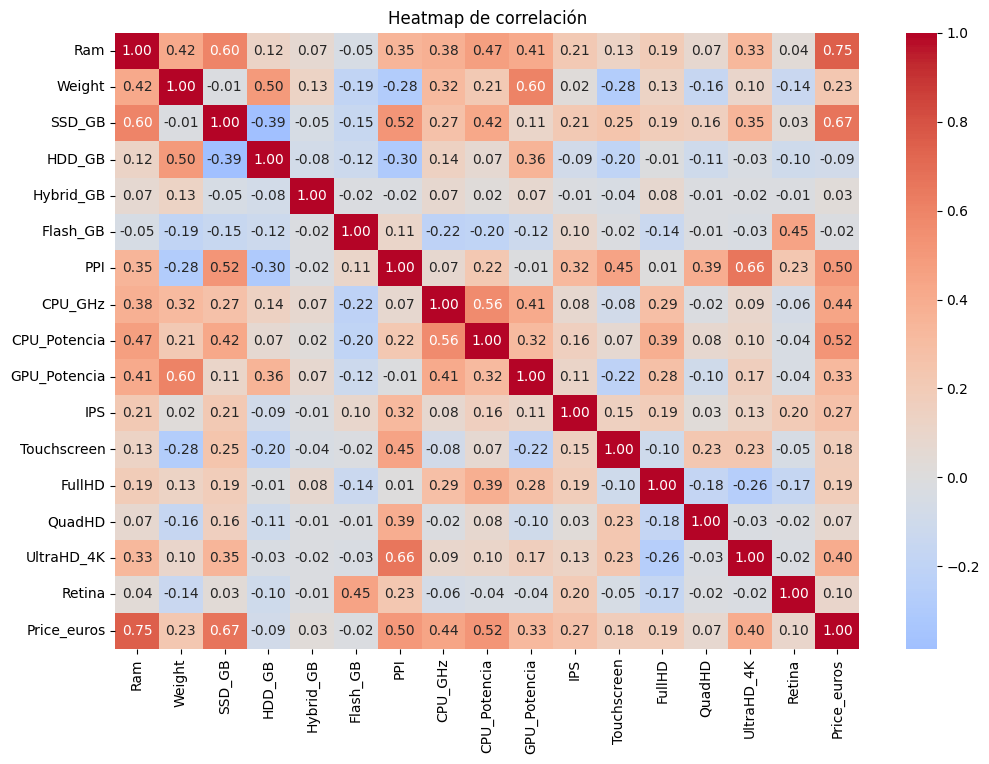

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Heatmap de correlación")
plt.show()

Elimino las columnas con baja relacion como Flash_GB, Quad... y CPU_GHz por tener mucha correlacion con CPU_Potencia y estar las 2 bien relacionadas con Price

In [29]:
columnas_a_quitar = ["HDD_GB", "Hybrid_GB", "Flash_GB", "Weight", "FullHD", "QuadHD", "Retina", "CPU_GHz"]
df_simplificado = df_final.drop(columns=columnas_a_quitar)
df_simplificado.head()

,Ram,SSD_GB,PPI,CPU_Potencia,GPU_Potencia,IPS,Touchscreen,UltraHD_4K,Company_clean,Company_Apple,...,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_clean,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Price_euros
0,-0.038512,-0.970848,-1.059750,0.827090,0.577393,0,0,0,Dell,False,...,False,False,False,Notebook,False,False,True,False,False,749.00
1,-0.855315,-0.970848,-1.059750,-1.072925,-0.847729,0,0,0,Asus,False,...,False,False,False,Notebook,False,False,True,False,False,449.00
2,-0.038512,0.407127,0.450039,0.193752,-0.847729,0,0,0,Toshiba,False,...,True,False,False,Notebook,False,False,True,False,False,1460.00
3,1.595095,0.407127,3.155440,0.827090,1.289954,1,0,1,Dell,False,...,False,False,False,Gaming,True,False,False,False,False,2868.99
4,-0.038512,0.407127,0.695591,0.193752,-0.847729,0,1,0,Dell,False,...,False,False,False,Ultrabook,False,False,False,True,False,1713.37


## Preparacion de X_train, y_train, X_test, y_test

In [30]:
X = df_simplificado.drop("Price_euros", axis = 1)
y = df_simplificado["Price_euros"]

In [31]:
df_simplificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ram                   912 non-null    float64
 1   SSD_GB                912 non-null    float64
 2   PPI                   912 non-null    float64
 3   CPU_Potencia          912 non-null    float64
 4   GPU_Potencia          912 non-null    float64
 5   IPS                   912 non-null    int64  
 6   Touchscreen           912 non-null    int64  
 7   UltraHD_4K            912 non-null    int64  
 8   Company_clean         912 non-null    object 
 9   Company_Apple         912 non-null    bool   
 10  Company_Asus          912 non-null    bool   
 11  Company_Chuwi         912 non-null    bool   
 12  Company_Dell          912 non-null    bool   
 13  Company_Fujitsu       912 non-null    bool   
 14  Company_Google        912 non-null    bool   
 15  Company_HP            9

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

## Probar Modelos

In [33]:
resultados = {}

#  Regresión Lineal 
lr = LinearRegression()
cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring="r2")
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
resultados["Linear"] = {
    "R2_CV_mean": np.mean(cv_scores),
    "MAE": mean_absolute_error(y_test, y_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
    "MAPE": mean_absolute_percentage_error(y_test, y_pred) * 100
}



ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Sergio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Sergio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sergio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_base.py", line 618, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "c:\Users\Sergio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 2971, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sergio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1368, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\Sergio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 971, in check_array
    array = array.astype(new_dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sergio\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\generic.py", line 6665, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sergio\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\managers.py", line 449, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "c:\Users\Sergio\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\managers.py", line 363, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sergio\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\blocks.py", line 784, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sergio\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\dtypes\astype.py", line 237, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sergio\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\dtypes\astype.py", line 182, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sergio\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\dtypes\astype.py", line 133, in _astype_nansafe
    return arr.astype(dtype, copy=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Dell'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Sergio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Sergio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sergio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_base.py", line 618, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "c:\Users\Sergio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 2971, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sergio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1368, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\Sergio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 971, in check_array
    array = array.astype(new_dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sergio\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\generic.py", line 6665, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sergio\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\managers.py", line 449, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "c:\Users\Sergio\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\managers.py", line 363, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sergio\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\blocks.py", line 784, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sergio\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\dtypes\astype.py", line 237, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sergio\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\dtypes\astype.py", line 182, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sergio\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\dtypes\astype.py", line 133, in _astype_nansafe
    return arr.astype(dtype, copy=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'HP'


Al probar el modelo vemos que ha fallado porque no habiamos limpiado 2 columnas de tipo texto. Las quitamos y volvemos a crear X e y y las particiones

In [34]:
X = df_simplificado.drop(["Price_euros","Company_clean","TypeName_clean"] , axis = 1)
y = df_simplificado["Price_euros"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [36]:
resultados = {}

#  Regresión Lineal 
lr = LinearRegression()
cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring="r2")
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
resultados["Linear"] = {
    "R2_CV_mean": np.mean(cv_scores),
    "MAE": mean_absolute_error(y_test, y_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
    "MAPE": mean_absolute_percentage_error(y_test, y_pred) 
}


In [37]:
# Regresión polinómica de 2 a 4

for grado in range(2, 5):
    poly = PolynomialFeatures(degree=grado, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    lr_poly = LinearRegression()
    cv_scores_poly = cross_val_score(lr_poly, X_train_poly, y_train, cv=5, scoring="r2")
    lr_poly.fit(X_train_poly, y_train)
    y_pred_poly = lr_poly.predict(X_test_poly)
    resultados[f"Polynomial_deg{grado}"] = {
        "R2_CV_mean": np.mean(cv_scores_poly),
        "MAE": mean_absolute_error(y_test, y_pred_poly),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_poly)),
        "MAPE": mean_absolute_percentage_error(y_test, y_pred_poly) 
    }

In [38]:
df_resultados = pd.DataFrame(resultados).T
df_resultados

,R2_CV_mean,MAE,RMSE,MAPE
Linear,0.748131,263.671065,405.232400,0.251318
Polynomial_deg2,-0.437366,326.522807,630.891161,0.283443
Polynomial_deg3,-120666.297840,6313.996029,25172.837234,5.051458
Polynomial_deg4,-17175.890492,29885.639130,132288.148050,19.965300


Con los resultados actuales voy a probar con regresion linear aplicando regularizacion Ridge y Lasso

In [39]:
alpha_values = np.logspace(-4, 4, 20)  # de 0.0001 a 10000 en escala logarítmica

In [40]:
ridge = Ridge()
param_grid_ridge = {"alpha": alpha_values}
grid_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring="r2")
grid_ridge.fit(X_train, y_train)

print("Mejor alpha Ridge:", grid_ridge.best_params_["alpha"])
print("Mejor R2 CV Ridge:", grid_ridge.best_score_)

Mejor alpha Ridge: 1.623776739188721
Mejor R2 CV Ridge: 0.7551526685994011


In [41]:
lasso = Lasso(max_iter=10000)
param_grid_lasso = {"alpha": alpha_values}
grid_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring="r2")
grid_lasso.fit(X_train, y_train)

print("Mejor alpha Lasso:", grid_lasso.best_params_["alpha"])
print("Mejor R2 CV Lasso:", grid_lasso.best_score_)

Mejor alpha Lasso: 0.615848211066026
Mejor R2 CV Lasso: 0.750353194000399


In [42]:
ridge_opt = Ridge(alpha=1.623776739188721)
ridge_opt.fit(X_train, y_train)
y_pred_ridge = ridge_opt.predict(X_test)

resultados["Ridge"] = {
    "R2_CV_mean": grid_ridge.best_score_,
    "MAE": mean_absolute_error(y_test, y_pred_ridge),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
    "MAPE": mean_absolute_percentage_error(y_test, y_pred_ridge)
}

In [43]:
lasso_opt = Lasso(alpha=0.615848211066026, max_iter=10000)
lasso_opt.fit(X_train, y_train)
y_pred_lasso = lasso_opt.predict(X_test)

resultados["Lasso"] = {
    "R2_CV_mean": grid_lasso.best_score_,
    "MAE": mean_absolute_error(y_test, y_pred_lasso),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
    "MAPE": mean_absolute_percentage_error(y_test, y_pred_lasso)
}

In [44]:
df_resultados = pd.DataFrame(resultados).T
df_resultados

,R2_CV_mean,MAE,RMSE,MAPE
Linear,0.748131,263.671065,405.232400,0.251318
Polynomial_deg2,-0.437366,326.522807,630.891161,0.283443
Polynomial_deg3,-120666.297840,6313.996029,25172.837234,5.051458
Polynomial_deg4,-17175.890492,29885.639130,132288.148050,19.965300
Ridge,0.755153,262.903404,396.994895,0.250711
Lasso,0.750353,264.042907,403.825192,0.249359


# PREDICCIONES PARA EL CONCURSO

In [45]:
datos_a_predecir = pd.read_csv("data/datos_a_predecir.csv")
datos_a_predecir.head()

,Ram,SSD_GB,PPI,CPU_Potencia,GPU_Potencia,IPS,Touchscreen,UltraHD_4K,Company_Apple,Company_Asus,...,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
0,1.311382,1.651244,4.276645,0.760480,-0.948754,1,0,1,False,False,...,False,False,False,False,False,False,False,False,True,False
1,-0.152573,0.327880,-1.099063,-1.853567,0.445843,0,0,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,-0.884551,-0.995485,-1.099063,-0.546543,-0.948754,0,0,0,False,False,...,False,False,False,False,False,False,False,True,False,False
3,-0.152573,0.327880,0.226079,0.106969,-0.948754,0,0,0,False,False,...,False,False,False,False,False,False,False,True,False,False
4,-0.152573,0.327880,0.418963,0.106969,-0.948754,1,0,0,False,False,...,False,False,False,False,False,False,False,True,False,False


In [46]:
X.head()

,Ram,SSD_GB,PPI,CPU_Potencia,GPU_Potencia,IPS,Touchscreen,UltraHD_4K,Company_Apple,Company_Asus,...,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
0,-0.038512,-0.970848,-1.059750,0.827090,0.577393,0,0,0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,-0.855315,-0.970848,-1.059750,-1.072925,-0.847729,0,0,0,False,True,...,False,False,False,False,False,False,False,True,False,False
2,-0.038512,0.407127,0.450039,0.193752,-0.847729,0,0,0,False,False,...,False,False,True,False,False,False,False,True,False,False
3,1.595095,0.407127,3.155440,0.827090,1.289954,1,0,1,False,False,...,False,False,False,False,False,True,False,False,False,False
4,-0.038512,0.407127,0.695591,0.193752,-0.847729,0,1,0,False,False,...,False,False,False,False,False,False,False,False,True,False


In [47]:
predicciones = ridge_opt.predict(datos_a_predecir)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Company_Fujitsu
- Company_Mediacom


Al crear el csv para predecir faltan 2 columnas. Las relleno a 0

In [48]:
# Suponiendo que df_train fue usado para entrenar y 'datos_a_predecir' es tu nuevo df
datos_a_predecir_arreglado = pd.get_dummies(datos_a_predecir)

# Añadir columnas faltantes
for col in X_train.columns:
    if col not in datos_a_predecir_arreglado.columns:
        datos_a_predecir_arreglado[col] = 0  # ponemos 0 para las categorías que no existen

# Asegurarse del mismo orden de columnas
datos_a_predecir_arreglado = datos_a_predecir_arreglado[X_train.columns]
datos_a_predecir_arreglado

,Ram,SSD_GB,PPI,CPU_Potencia,GPU_Potencia,IPS,Touchscreen,UltraHD_4K,Company_Apple,Company_Asus,...,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
0,1.311382,1.651244,4.276645,0.760480,-0.948754,1,0,1,False,False,...,False,False,False,False,False,False,False,False,True,False
1,-0.152573,0.327880,-1.099063,-1.853567,0.445843,0,0,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,-0.884551,-0.995485,-1.099063,-0.546543,-0.948754,0,0,0,False,False,...,False,False,False,False,False,False,False,True,False,False
3,-0.152573,0.327880,0.226079,0.106969,-0.948754,0,0,0,False,False,...,False,False,False,False,False,False,False,True,False,False
4,-0.152573,0.327880,0.418963,0.106969,-0.948754,1,0,0,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,-0.152573,0.327880,-0.149798,0.760480,1.143142,1,0,0,False,False,...,False,False,False,False,False,True,False,False,False,False
387,1.311382,1.651244,-0.149798,0.760480,1.143142,1,0,0,False,False,...,False,False,False,False,False,True,False,False,False,False
388,-0.884551,-0.995485,-1.099063,0.106969,-0.948754,0,0,0,False,False,...,False,False,False,False,False,False,False,True,False,False
389,-0.884551,-0.995485,-0.149798,-1.853567,0.445843,0,0,0,False,False,...,False,False,False,False,False,False,False,True,False,False


In [49]:
predicciones = ridge_opt.predict(datos_a_predecir_arreglado)

In [50]:
predicciones

array([2601.53747021,  655.09940994,  413.75705112, 1058.44055501,
       1072.51114523, 1735.54995398, 2892.69642907,  544.66891955,
       4521.63300569, 1301.9517603 , 1484.6275144 ,  583.02222044,
        214.77129887,  600.98971507,  491.10650158,  973.09401823,
        492.83561349, 1397.97030807, 1152.07070656, 1689.59891295,
       1447.18804854,  893.76668031, 1268.01096468, 1311.33170459,
       1727.06575744,  569.73055305,  726.24352098,  354.90878401,
       1158.75569716,  409.72641063, 1147.39388432, 1159.51021875,
       1824.18067541,  376.25267638,  554.07921297, 1727.06575744,
        940.81467182,  834.14156863, 2466.30517755,  449.93855251,
        677.21990105, 1007.44219054, 1513.76479285, 1801.11147269,
       1177.84352113, 1628.61432312,  567.14431372, 2658.52502056,
        194.67807496, 1669.70926557, 1007.63164942,  889.03222473,
        831.55171886,  327.00607424, 1208.17143483,  685.77568638,
        710.65628356,  123.13375658,  961.18255735, 1384.99366

In [51]:
entrega = pd.read_csv("data/test.csv")
entrega

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,181,1098,HP,Spectre x360,Ultrabook,13.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.3kg
1,708,330,Acer,Aspire 5,Notebook,15.6,1366x768,AMD A12-Series 9720P 2.7GHz,8GB,256GB SSD,AMD Radeon RX 540,Windows 10,2.2kg
2,862,1260,Acer,Aspire ES1-572,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,500GB HDD,Intel HD Graphics 520,Linux,2.4kg
3,1064,1137,HP,EliteBook 1040,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.43kg
4,702,1015,HP,ENVY -,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.34kg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,1281,145,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050M,No OS,2.4kg
387,524,1195,Lenovo,IdeaPad Y700-15ISK,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,512GB SSD,Nvidia GeForce GTX 960,Windows 10,3.31kg
388,1015,1070,HP,250 G5,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,No OS,1.96kg
389,1236,104,HP,15-bw000nv (E2-9000e/4GB/500GB/Radeon,Notebook,15.6,Full HD 1920x1080,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,Windows 10,2.1kg


In [52]:
entrega["Price_euros"] = predicciones

In [53]:
lista_col = ["id", "Price_euros"]
entrega = entrega.drop(columns = [col for col in entrega.columns if col not in lista_col])
entrega

,id,Price_euros
0,181,2601.537470
1,708,655.099410
2,862,413.757051
3,1064,1058.440555
4,702,1072.511145
...,...,...
386,1281,1419.863856
387,524,1988.173916
388,1015,576.339696
389,1236,423.223774


In [59]:
entrega.to_csv("data/pred_ridge.csv")

In [56]:
entrega_lr = pd.read_csv("data/test.csv")
entrega_lr

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,181,1098,HP,Spectre x360,Ultrabook,13.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.3kg
1,708,330,Acer,Aspire 5,Notebook,15.6,1366x768,AMD A12-Series 9720P 2.7GHz,8GB,256GB SSD,AMD Radeon RX 540,Windows 10,2.2kg
2,862,1260,Acer,Aspire ES1-572,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,500GB HDD,Intel HD Graphics 520,Linux,2.4kg
3,1064,1137,HP,EliteBook 1040,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.43kg
4,702,1015,HP,ENVY -,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.34kg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,1281,145,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050M,No OS,2.4kg
387,524,1195,Lenovo,IdeaPad Y700-15ISK,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,512GB SSD,Nvidia GeForce GTX 960,Windows 10,3.31kg
388,1015,1070,HP,250 G5,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,No OS,1.96kg
389,1236,104,HP,15-bw000nv (E2-9000e/4GB/500GB/Radeon,Notebook,15.6,Full HD 1920x1080,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,Windows 10,2.1kg


In [57]:
predicciones_lr = lr.predict(datos_a_predecir_arreglado)
predicciones_lr

array([2571.27547127,  604.43659671,  379.42626229, 1053.83343689,
       1076.02936028, 1724.94252264, 3287.34437671,  547.79359505,
       4472.31176475, 1291.41210002, 1481.59079751,  588.31736853,
        208.50864777,  611.9382445 ,  503.35853852,  975.76519426,
        456.97157374, 1382.72142282, 1155.61855853, 1667.86145289,
       1450.57312665,  858.54511298, 1261.96010905, 1317.77447506,
       1712.47177016,  587.52488022,  728.16351766,  362.27397201,
       1156.31403028,  424.50104608, 1136.16358391, 1177.9295711 ,
       1826.81351699,  393.46690362,  564.06700591, 1712.47177016,
        939.85482318,  853.26421442, 2459.33116817,  409.01870206,
        703.34814862,  998.92921116, 1496.83707369, 1814.09690954,
       1181.46581095, 1568.14598952,  578.70633736, 2629.36935527,
        213.09698101, 1655.57325232, 1008.07645044,  886.34846167,
        842.22776102,  349.2351324 , 1207.26167181,  700.24154301,
        714.89217373,  141.00100624,  965.36491328, 1390.72587

In [58]:
entrega_lr["Price_euros"] = predicciones_lr
entrega_lr= entrega_lr.drop(columns = [col for col in entrega.columns if col not in lista_col])
entrega

,id,Price_euros
0,181,2601.537470
1,708,655.099410
2,862,413.757051
3,1064,1058.440555
4,702,1072.511145
...,...,...
386,1281,1419.863856
387,524,1988.173916
388,1015,576.339696
389,1236,423.223774


In [61]:
entrega_lr.to_csv("data/pred_lr.csv")